## Introduction



In our last project we used data to estimate systems of food demand
using different datasets.  An output from that project was as set of
`cfe.Result` objects; these bundle together both data and the results
from the demand system estimation, and can be used for prediction as
well.  

Here we&rsquo;ll explore some of the uses of the `cfe.Result` class, using
an instance created using data from the Indian ICRISAT data.

If you don&rsquo;t already have the latest version of the `cfe` package
installed, grab it, along with some dependencies:



In [1]:
!pip install -r requirements.txt

In [2]:
import cfe

cfe.Result?
import pandas as pd 

Missing dependencies for OracleDemands.


An instance `r` of `cfe.Result` can be made persistent with
`r.to_dataset('my_result.ds')`, which saves the instance &ldquo;on disk&rdquo; in
[NetCDF format](https://en.wikipedia.org/wiki/NetCDF), and can be loaded using `cfe.from_dataset`.  We use
this method below to load data and demand system estimated from the
Indian ICRISAT data:



In [3]:
r = cfe.from_dataset('./bengali_t_2.ds',engine='netcdf4')

r

<xarray.Result>
Dimensions:           (i: 77, k: 19, t: 1, m: 1, j: 6315, kp: 19)
Coordinates:
  * i                 (i) object 'apple' ... 'wheat/atta - other sources'
  * k                 (k) object 'Males 0-1' 'Males 1-5' ... 'log Hsize'
  * t                 (t) int64 1
  * m                 (m) int64 1
  * j                 (j) object '419101101' '419101102' ... '727892301'
  * kp                (kp) object 'Males 0-1' 'Males 1-5' ... 'log Hsize'
Data variables: (12/20)
    alpha             float64 nan
    beta              (i) float64 0.496 0.3707 0.4779 ... 0.2675 0.0964 0.1855
    delta             (k, i) float64 0.1401 -0.2878 0.02118 ... 0.6944 0.3445
    prices            (i, t, m) float64 104.7 98.68 17.11 ... 71.91 6.692 22.15
    characteristics   (k, j, t, m) float64 0.0 0.0 0.0 ... 1.386 0.6931 1.946
    loglambdas        (j, t, m) float64 -0.6023 0.8258 1.071 ... -1.476 -0.1362
    ...                ...
    se_beta           float64 nan
    se_alpha          float64 nan
    se_a              (i, t, m) float64 0.01903 0.03035 ... 0.01467 0.01299
    y                 (i, j, t, m) float64 4.317 4.248 nan nan ... nan nan nan
    logp              (i, t, m) float64 4.651 4.592 2.84 ... 4.275 1.901 3.098
    z                 (k, j, t, m) float64 0.0 0.0 0.0 ... 1.386 0.6931 1.946
Attributes:
    firstround:            1
    min_proportion_items:  0.125
    min_xproducts:         30
    all_tm:                True
    common_alpha:          True
    useless_expenditures:  False
    stderr_tol:            0.01
    indices:               Indices(j='j', t='t', m='m', i='i', k='k')
    iterate:               False
    verbose:               False

Our focus earlier was on estimation, but the result `r` already has
encoded in it the results of that estimation.

There are parameters $\alpha$:

(higher alpha, larger share in total food expenditure)

In [4]:
r.get_alpha(as_df=True).dropna().sort_values(ascending=False)

i
lpg                     5.234320
rice - other sources    5.023198
milk: liquid            4.882705
goat meat               4.818306
firewood & chips        4.753999
                          ...   
besan                   1.645212
dry chillies            1.590987
dhania                  1.472786
salt                    1.326400
oilseeds                1.218876
Name: alpha, Length: 77, dtype: float64

Elasticity parameters $\beta$ (we can&rsquo;t estimate all, so some are missing):



In [5]:
r.get_beta(as_df=True).dropna().sort_values(ascending=False)

i
pickles                 0.751800
dates                   0.573696
orange,mausami          0.512298
curd                    0.499519
apple                   0.496006
                          ...   
mustard oil             0.124608
wheat/atta - P.D.S.     0.096397
potato                  0.093016
muri                    0.079579
rice - other sources    0.067727
Name: beta, Length: 77, dtype: float64

In [6]:
with pd.option_context('display.max_rows', None,):
    print(r.get_beta(as_df=True).dropna().sort_values(ascending=False))

i
pickles                                             0.751800
dates                                               0.573696
orange,mausami                                      0.512298
curd                                                0.499519
apple                                               0.496006
cashewnut                                           0.495232
grapes                                              0.485833
curry powder                                        0.479823
banana                                              0.477885
chips                                               0.458191
tomato                                              0.454772
besan                                               0.450311
fish ( fresh )                                      0.449225
gram (whole)                                        0.447225
bread (bakery)                                      0.446123
sauce, jam, jelly                                   0.435692
guava                 

And parameters related to household characteristics $\delta$:



In [7]:

#r.get_delta(as_df=True).dropna()

# Or
from cfe.df_utils import to_dataframe
to_dataframe(r.delta).unstack('k')

k,Males 0-1,Males 1-5,Males 5-10,Males 10-15,Males 15-20,Males 20-30,Males 30-50,Males 50-60,Males 60-100,Females 0-1,Females 1-5,Females 5-10,Females 10-15,Females 15-20,Females 20-30,Females 30-50,Females 50-60,Females 60-100,log Hsize
i,,,,,,,,,,,,,,,,,,,
apple,0.140054,-0.007784,-0.030235,0.067374,-0.011472,0.002477,-0.012606,0.103066,0.212665,-0.264834,0.032922,-0.007987,0.044757,-0.038309,0.174866,0.263484,0.114062,0.204580,-0.067697
arhar (tur),-0.287830,0.246268,0.250741,0.172021,0.356639,0.252322,0.196279,0.163880,0.088135,-0.308011,0.154856,0.150971,0.146467,0.172516,0.148634,-0.040523,0.221362,0.011917,-0.098210
banana,0.021184,0.015974,0.000388,0.013626,-0.039526,0.031326,0.092942,0.177143,0.222820,-0.162653,-0.062048,-0.015986,-0.003951,0.001248,0.021501,0.064457,0.083629,0.142937,0.120031
besan,0.026619,-0.007839,0.014966,0.031989,0.049018,0.068661,0.054182,0.162958,0.083755,0.098120,-0.033183,-0.018437,0.007424,0.039843,0.052130,0.109855,0.134904,0.024216,0.350544
black pepper,0.150579,0.093137,-0.024558,0.112120,0.127869,0.090231,0.013454,0.025392,0.092368,-0.038844,0.086744,0.009830,0.030404,0.024502,-0.002596,0.054639,0.093476,0.170520,0.144662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tomato,-0.102729,-0.013199,0.009855,0.025858,0.011730,0.058775,0.111590,0.136450,0.164900,-0.117048,-0.044966,0.003451,-0.002357,0.010449,0.063016,0.071056,0.081072,0.031568,0.326630
turmeric,-0.101660,-0.110070,-0.031389,-0.050036,-0.040818,-0.013583,0.039161,0.056210,0.058252,-0.182901,-0.109768,-0.067095,-0.025956,-0.017790,0.025037,0.028303,0.023051,-0.009568,0.575886
urd,0.113748,0.111208,0.047185,0.109537,0.156272,0.169190,0.154355,0.078008,0.048054,-0.341310,0.103046,0.131021,0.089356,0.101879,0.101286,0.149827,0.066350,0.072795,0.029730


The triple of parameters $(\alpha,\beta,\delta)$ completely describes
the demand system and the corresponding utility function (over the
goods we observe).



## Demands



As mentioned above, we&rsquo;ve estimated the parameters of a Frischian
demand system (demands that depend on prices and the households
marginal utility of expenditures).  But we can *compute* the
corresponding Marshallian (depends on prices and budget) or Hicksian
(depends on prices and the level of utility) demands for this same
population, using the `cfe.Result.demands` method.  

Let&rsquo;s compute Marshallian demands.  Start with a choice of budget $x$
and prices.  We&rsquo;ll use the earliest prices, and focus on
the first market we&rsquo;re interested in.



In [18]:
#t = r.firstround  # First round
#m = r.coords['m'][0] # First market

t=1
m=1

x = r.get_predicted_expenditures().sum('i')
median_x = x.where(x>0).sel(t=t,m=m).median('j') # Budget (median household)

# Note selection of prices for 1975 for market A
p = r.prices.sel(t=t,m=m).fillna(1).copy()

p.to_dataframe().fillna(1).squeeze()
p_df = p.to_dataframe().fillna(1).squeeze()
p_df = p_df.drop(['firewood & chips','lpg'], axis = 0)
p_df

,t,m,prices
i,,,
apple,1,1,104.693121
arhar (tur),1,1,98.678479
banana,1,1,17.112447
besan,1,1,46.824860
black pepper,1,1,345.478186
...,...,...,...
tomato,1,1,21.596503
turmeric,1,1,185.630514
urd,1,1,71.913813


In [9]:
with pd.option_context('display.max_rows', None,):
    print(p_df)

                                                  t  m      prices
i                                                                 
apple                                             1  1  104.693121
arhar (tur)                                       1  1   98.678479
banana                                            1  1   17.112447
besan                                             1  1   46.824860
black pepper                                      1  1  345.478186
bread (bakery)                                    1  1   39.250858
brinjal                                           1  1   19.648799
cabbage                                           1  1    9.771719
candy (misri)                                     1  1   65.042545
carrot                                            1  1   24.452699
cashewnut                                         1  1  512.648542
cauliflower                                       1  1   11.198188
chicken                                           1  1  137.76

In [13]:
p_df.index

Index(['apple', 'arhar (tur)', 'banana', 'besan', 'black pepper',
       'bread (bakery)', 'brinjal', 'cabbage', 'candy (misri)', 'carrot',
       'cashewnut', 'cauliflower', 'chicken', 'chillis (green)', 'chips',
       'chira', 'coconut', 'cold beverages: bottled/canned', 'curd',
       'curry powder', 'dates', 'dhania', 'dry chillies', 'eggs',
       'firewood & chips', 'fish ( fresh )', 'french beans and barbati',
       'garlic', 'ghee', 'ginger', 'goat meat', 'gourd, pumpkin',
       'gram (split)', 'gram (whole)', 'grapes', 'groundnut', 'guava', 'gur',
       'jeera', 'lady's finger', 'lemon', 'lpg', 'maida', 'mango', 'masur',
       'milk : condensed/ powder', 'milk: liquid', 'moong', 'muri',
       'mustard oil', 'oilseeds', 'onion', 'orange,mausami',
       'other pulse products', 'other spices', 'palak', 'parwal / patal',
       'peas-pulses', 'pickles', 'potato', 'radish',
       'raisin (kishmish, monacca etc.)',
       'refined oil [sunflower, soyabean, saffola, etc.]',
 

In [13]:
import numpy
numpy.array(p_df.loc[p_df["prices"] == 1].index)

array(['banana', 'bidi', 'biscuits, chocolates', 'black pepper',
       'cake, pastry, prepared sweets', 'candle ', 'chips', 'cigarettes ',
       'coconut', 'cold beverages: bottled/canned', 'cooked meals',
       'cooked snacks purchased [samosa, puri, paratha,', 'curry powder',
       'dhania', 'dry chillies', 'dung cake', 'eggs', 'electricity ',
       'garlic', 'ginger', 'ice-cream', 'ingredients for pan', 'jeera',
       'kerosene-other sources', 'kerosene-pds ', 'lemon', 'matches ',
       'milk: liquid', 'oilseeds', 'orange,mausami', 'other fresh fruits',
       'other fuel ', 'other packaged processed food',
       'other served processed food', 'other spices', 'other vegetables',
       'pan : finished', 'pan : leaf',
       'papad, bhujia, namkeen, mixture, chanachur', 'pickles',
       'sauce, jam, jelly', 'tamarind', 'tea : cups', 'tea : leaf',
       'turmeric'], dtype=object)

Now compute expenditures on different items.  The object `r` already knows what the estimated
parameters are, and uses those automatically:



In [35]:
c=r.demands(median_x,p)
c

/opt/conda/lib/python3.9/site-packages/demands/_utils.py:52: UserWarning: Setting negative values of beta to zero.
  warnings.warn('Setting negative values of beta to zero.')


i
apple                         2.807689
arhar (tur)                   1.459496
bajra & products              1.000000
banana                        7.067812
besan                         1.254970
                                ...   
urd                           1.226784
vanaspati, margarine          1.250775
watermelon                    2.167884
wheat/atta - P.D.S.           1.282927
wheat/atta - other sources    1.656689
Name: quantities, Length: 103, dtype: float64

Now we can trace out demands for a household with median budget but
varying prices of (say) coconuts (holding other prices fixed):



Text(0, 0.5, 'Price Scale')

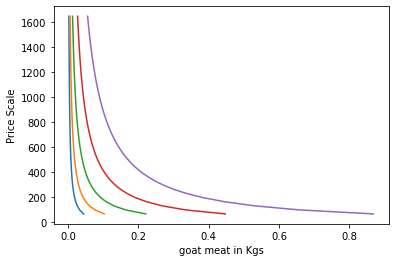

In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

USE_GOOD = 'goat meat'
    
# Values for prices
ref_price = r.prices.sel(i=USE_GOOD,t=t,m=m)
P = np.linspace(ref_price/5,ref_price*5,50)

def my_prices(p0,p=p,i=USE_GOOD):
    p = p.copy()
    p.loc[i] = p0*p.sel(i=i)
    return p

for myx in [median_x*s for s in [.25,.5,1.,2,4]]:
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        plt.plot([r.demands(myx,my_prices(p0))[USE_GOOD] for p0 in P],P)

plt.xlabel("%s in Kgs" % USE_GOOD)
plt.ylabel('Price Scale')

Text(0, 0.5, 'Price Scale')

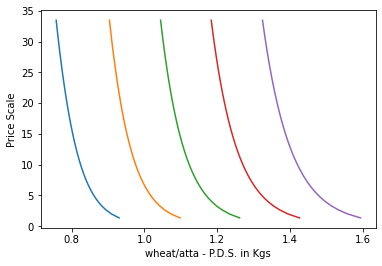

In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

USE_GOOD = 'wheat/atta - P.D.S.'
    
# Values for prices
ref_price = r.prices.sel(i=USE_GOOD,t=t,m=m)
P = np.linspace(ref_price/5,ref_price*5,50)

def my_prices(p0,p=p,i=USE_GOOD):
    p = p.copy()
    p.loc[i] = p0*p.sel(i=i)
    return p

for myx in [median_x*s for s in [.25,.5,1.,2,4]]:
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        plt.plot([r.demands(myx,my_prices(p0))[USE_GOOD] for p0 in P],P)

plt.xlabel("%s in Kgs" % USE_GOOD)
plt.ylabel('Price Scale')

In [37]:
r.sel(i=USE_GOOD)

<xarray.Result>
Dimensions:           (k: 19, t: 1, m: 1, j: 8043, kp: 19)
Coordinates:
    i                 <U19 'wheat/atta - P.D.S.'
  * k                 (k) object 'Males 0-1' 'Males 1-5' ... 'log Hsize'
  * t                 (t) int64 1
  * m                 (m) int64 1
  * j                 (j) object '421001201' '421001202' ... '756991302'
  * kp                (kp) object 'Males 0-1' 'Males 1-5' ... 'log Hsize'
Data variables: (12/20)
    alpha             float64 3.511
    beta              float64 0.05713
    delta             (k) float64 -0.05307 -0.1296 -0.06066 ... -0.05612 0.6224
    prices            (t, m) float64 6.693
    characteristics   (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... 1.386 1.609 1.609
    loglambdas        (j, t, m) float64 -1.296 -1.244 nan ... 0.9579 0.2482
    ...                ...
    se_beta           float64 nan
    se_alpha          float64 0.01508
    se_a              (t, m) float64 0.01508
    y                 (j, t, m) float64 nan nan nan nan ... 5.075 3.912 nan
    logp              (t, m) float64 1.901
    z                 (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... 1.386 1.609 1.609
Attributes:
    firstround:            1
    min_proportion_items:  0.125
    min_xproducts:         30
    all_tm:                True
    common_alpha:          True
    useless_expenditures:  False
    stderr_tol:            0.01
    indices:               Indices(j='j', t='t', m='m', i='i', k='k')
    iterate:               False
    verbose:               False

And here are Engel curves (response to budget) holding prices fixed:



/opt/conda/lib/python3.9/site-packages/demands/_utils.py:52: UserWarning: Setting negative values of beta to zero.
  warnings.warn('Setting negative values of beta to zero.')


Text(0.5, 0, 'Budget')

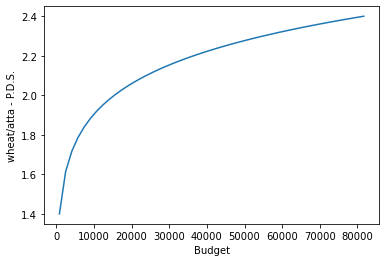

In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

USE_GOOD = 'wheat/atta - P.D.S.'
    
# Values for prices
ref_price = r.prices.sel(i=USE_GOOD,t=t,m=m)

# Range of budgets to consider
X = np.linspace(median_x/10,median_x*10,50)

plt.plot(X,[r.demands(x,ref_price)[USE_GOOD] for x in X])

plt.ylabel(USE_GOOD)
plt.xlabel('Budget')